## ***REGRESIÓN LOGÍSTICA ***

Vamos a suponer que queremos predecir cuál es la probabilidad que tiene un estudiante de aprobar un examen en función de las horas que ha estudiado. Date cuenta que para 1.75 horas de estudio, hay un estudiante que aprueba y el otro que no.

*Problema tomado de *(https://www.iartificial.net/como-usar-regresion-logistica-en-python/)

La regresión Logística incialmente se usa para clasificaciones en terminos binarios es decir donde la salida (target) puede determinar si pertene a un grupo u otro dependiendo el contexto problema. pero tambien nos permite enontrar la probabilidad que el evento pase o no lo cual lo hace realmente interesante dado su funcionalidad aplicada.

Para este caso en particular la variable de salida (y) sera:

0 = No aprobar la asignatura de estadística aplicada.
1 = Aprobar la asignatura estadística aplicada.

Mientras que la variable de entrada (x) (en este caso solo sera una pero podria ser multivariable) seria las horas de estudio.



In [106]:
# Paso 1: importamos las librerías 
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sb


In [107]:
# Paso 2: preparamos los datos (notese que en este caso se introduciran directamente como matrices(arrays))

X = np.array([0.5, 0.75, 1, 1.25, 1.5, 1.75, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 4, 4.25, 4.5, 4.75, 5, 5.5]).reshape(-1,1)
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])
dfx = pd.DataFrame(X, columns = ["Horas de estudio"])
dfy = pd.DataFrame(y, columns = ['Aprobo'])
dfcombine = dfx.join(dfy)
print(dfcombine)

    Horas de estudio  Aprobo
0               0.50       0
1               0.75       0
2               1.00       0
3               1.25       0
4               1.50       0
5               1.75       0
6               1.75       1
7               2.00       0
8               2.25       1
9               2.50       0
10              2.75       1
11              3.00       0
12              3.25       1
13              3.50       0
14              4.00       1
15              4.25       1
16              4.50       1
17              4.75       1
18              5.00       1
19              5.50       1


In [108]:
#Estadistica descriptiva de los datos 
dfcombine.describe()

,Horas de estudio,Aprobo
count,20.000000,20.000000
mean,2.787500,0.500000
std,1.507165,0.512989
min,0.500000,0.000000
25%,1.687500,0.000000
50%,2.625000,0.500000
75%,4.062500,1.000000
max,5.500000,1.000000


# **Exploración gráfica para comprender los datos.**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc3d6e1a450>]],
      dtype=object)

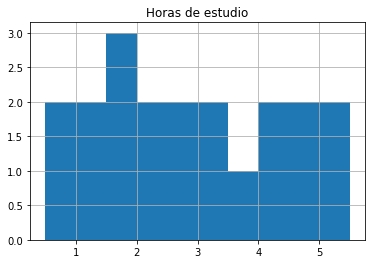

In [109]:
dfcombine.hist("Horas de estudio")

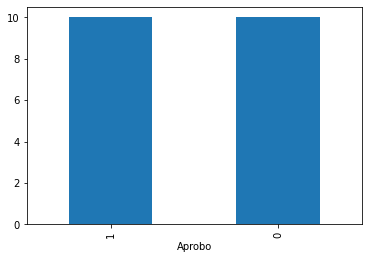

In [110]:
dfcombine.value_counts("Aprobo").plot(kind="bar")

In [111]:
#identificar correlacion de las variables
dfcombine.corr()

,Horas de estudio,Aprobo
Horas de estudio,1.000000,0.689243
Aprobo,0.689243,1.000000


In [112]:
#creando el modelo de regresión logística
model = LogisticRegression()
model.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [113]:
# Información del modelo
# ==============================================================================
print("Intercept:", model.intercept_)
print("Coeficiente:", model.coef_ )
print("Accuracy de entrenamiento:", model.score(X, y)) 

Intercept: [-3.13952411]
Coeficiente: [[1.14860386]]
Accuracy de entrenamiento: 0.8


In [114]:
#realizando predicciones frente al modelo y nuevos datos
X_nuevo = np.array([1, 2, 3, 4, 5, 6]).reshape(-1,1)

#Usa el modelo entrenado para obtener las predicciones con datos nuevos
prediccion = model.predict(X_nuevo)
print(prediccion)
# produce el resultado: [0 0 1 1 1 1]  
# En este caso estamos observando que: 
    # una persona que estudia 1 horas no aprobaria
    # una persona que estudia 2 horas no aprobaria
    # una persona que estudia 3 horas aprobaria
#y asi sucesivamnete 

[0 0 1 1 1 1]


In [115]:
#hallando las probabilidades de aprobar o no
probabilidades_prediccion = model.predict_proba(X_nuevo)
print(probabilidades_prediccion)
#print(probabilidades_prediccion[:,1])
#primera columa probabilidad de aprobar , segunda Columna probabilidad de no aprobar

[[0.87984046 0.12015954]
 [0.69895285 0.30104715]
 [0.42402118 0.57597882]
 [0.18924992 0.81075008]
 [0.06891381 0.93108619]
 [0.02293029 0.97706971]]
